In [20]:
import math
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import csv

print ('Done.')

Done.


In [207]:
#Helper Functions

def exist(pts, latt):
    latt = np.array(latt)
    for i in range(pts.shape[0]):
        if pts[i][0]==latt[0]:
            if pts[i][1]==latt[1]:
                if pts[i][2]==latt[2]:
                    return 1
    return 0

def face_list(p1):
    face_p1 = p1.faces(1)
    list_face_p1 = list(face_p1)
    faces = []
    for i in range(len(face_p1)):
        faces.append([])
    for i in range(len(face_p1)):
        faces[i].append(list(list_face_p1[i].vertices()[0]))
        faces[i].append(list(list_face_p1[i].vertices()[1]))
    return faces

#Convert a set of vertices into a list
def vert_to_list(vert):
    num_vert = len(vert)
    vert_list = []
    for i in range(num_vert):
        vert_list.append(list(vert[i]))
    return vert_list

#Calcualte the distance between two pts
def dist(p1, p2):
    return sqrt((p1[0]-p2[0])^2+(p1[1]-p2[1])^2+(p1[2]-p2[2])^2)

def on_edge(latt, faces):
    for i in range(len(faces)):
        if (dist(faces[i][0], faces[i][1]) == (dist(faces[i][0], latt) + dist(faces[i][1], latt))):
            #print 'edge: ', faces[i][0], ' and ', faces[i][1]
            #print 'l1: ', dist(faces[i][0], faces[i][1])
            #print 'l2: ', dist(faces[i][0], latt) + dist(faces[i][1], latt)
            return 1
    return 0

#Add lattice points onto the edge of a polygon
def add_lattice(poly):
    #convert vertices to points
    pts = []
    vert = list(poly.vertices())
    num_pts = len(vert)
    
    for i in range(num_pts):
        pts.append(list(vert[i]))
        
    #find the maximum of points
    pts = np.array(pts)
    pts_max = int(max(np.amax(np.absolute(pts), axis=0)))+1
    pts_new = pts
    
    faces = face_list(poly)
    
    for i in range(-pts_max, pts_max):
        for j in range(-pts_max, pts_max):
            for k in range(-pts_max, pts_max):
                latt = [i,j,k]
                if latt in pts.tolist():
                    continue
                if poly.contains(latt) == 1 or on_edge(latt, faces) == 1:
                #if on_edge(latt, faces) == 1:
                    pts_new = np.append(pts_new, np.array(latt).reshape((1,3)), axis = 0)  
    #print 'pts_new: '
    #print pts_new
    pts_new = pts_new.tolist()
    poly_new = Polyhedron(vertices = pts_new)
    
    
    
    return poly_new, pts_new


#remove a point from a polyhedron
#input: points of a polyhedron; a point to be removed
#output: polyhedron with a point removed
def remove_pts(pts, remove_pt):
    #points to remove
    pts_removed = pts
    
    #backup points
    pts_save = np.array(pts)
    
    #remove points
    pts_removed.remove(remove_pt)
    
    #restore
    pts = pts_save.tolist()
    
    poly_new = Polyhedron(vertices = pts_removed)
    
    return poly_new

#Count the number of lattice points inside a polytope
def num_latt(poly):
    count = 0
    
    #convert vertices to points
    pts = []
    vert = list(poly.vertices())
    num_pts = len(vert)
    
    for i in range(num_pts):
        pts.append(list(vert[i]))
    
    #find the maximum of points
    pts = np.array(pts)
    pts_max = int(max(np.amax(pts, axis=0)))+1
    
    faces = face_list(poly)
    
    for i in range(-pts_max, pts_max):
        for j in range(-pts_max, pts_max):
            for k in range(-pts_max, pts_max):
                latt = [i,j,k]
                if latt in pts.tolist():
                    continue
                if poly.contains(latt) == 1:
                    count += 1
    return count

In [210]:
#Execution Cell

output_path = 'output/polygon/poly_out_1024.txt'

def generate_poly(size, num_poly, output_path):
    
    output = open(output_path, 'w')
    
    p1 = polytopes.hypercube(3)
    p1 = p1.dilation(size)
    
    poly, pts = add_lattice(p1)
    print "Step 1: add lattice done."
    
    for i in range(num_poly):
        
        face_pts = list(poly.faces(2))
        num_faces = len(face_pts)
        face_idx = np.random.randint(num_faces)
        pt_idx = np.random.randint(3)
        remove_pt = list(face_pts[face_idx].vertices()[pt_idx])
        poly = remove_pts(pts, remove_pt)
        poly_vert = vert_to_list(poly.vertices())
        output.write("%s\n" % poly_vert)
        #poly.plot().save("img/plot_2_%d.png" % i)
        
        if len(poly_vert) <= 4:
            print 'Not enough points.'
            break
    
    print "Step 2: remove points done."
    output.close()
    
generate_poly(2, 1024, output_path)

Step 1: add lattice done.
Step 2: remove points done.


In [212]:
import imageio

def generate_gif(num_poly):
    images = []
    for i in range(num_poly):
        filename = "img/plot_2_%d.png"%i
        images.append(imageio.imread(filename))
    imageio.mimsave('img/movie_2.gif', images)

generate_gif(30)

In [208]:
p1 = polytopes.hypercube(3)
p1 = p1.dilation(2)
poly, pts = add_lattice(p1)

face_pts = list(poly.faces(2))
num_faces = len(face_pts)
remove_pt = list(face_pts[0].vertices()[0])
poly = remove_pts(pts, remove_pt)

print num_latt(poly)

114


In [3]:
out_path = 'output/polygon/simplex/xyz_10.txt'
out_file = open(out_path, 'w')
for x in range(1, 10):
    for y in range(1, 10):
        for z in range(1, 10):
            out = [[x,0,0],[0,y,0],[0,0,z]]
            out_file.write("%s\n" % out)

In [5]:
out_path = 'output/polygon/cylinder/cyl_10.txt'
out_file = open(out_path, 'w')
for N in range(1, 10):
    for h1 in range(0, 10):
        for h2 in range(0, 10):
            if N >= (2*h1+h2) and N >= (2*h2+h1):
                out = [[0,0,0],[1,0,0],[0,1,0],[1,0,h1],[0,1,h2],[0,0,N-h1-h2]]
                out_file.write("%s\n" % out)

In [6]:
def exist(pts, latt):
    latt = np.array(latt)
    for i in range(pts.shape[0]):
        if pts[i][0]==latt[0]:
            if pts[i][1]==latt[1]:
                if pts[i][2]==latt[2]:
                    return 1
    return 0

def dist(p1, p2):
    return sqrt((p1[0]-p2[0])^2+(p1[1]-p2[1])^2+(p1[2]-p2[2])^2)

def on_edge(latt, poly):
    edges = poly.faces(1)
    num_edges = len(edges)
    for i in range(num_edges):
        pt1 = list(edges[i].vertices()[0])
        pt2 = list(edges[i].vertices()[1])
        if (dist(pt1, pt2) == (dist(pt1, latt) + dist(pt2, latt))):
            return 1
    return 0

def on_face(latt, poly):
    faces = poly.faces(2)
    for face in poly.faces(2):
        face_pts = [list(face.vertices()[i]) for i in range(len(face.vertices()))]
        face_poly = Polyhedron(face_pts)
        if face_poly.contains(latt) == 1:
            return 1
    return 0

def count_pts(pts):
    # Count the number of corner points, edge points, face points, and body points
    num_corner = len(pts)
    num_edge = 0
    num_face = 0
    num_body = 0
    #edge = []
    #face = []
    #body = []
    pts_max = int(max(np.amax(pts, axis=0)))+1
    pts_min = int(min(np.amin(pts, axis=0)))-1
    #print 'pts_max: ', pts_max
    #print 'pts_min: ', pts_min
    poly = Polyhedron(pts)
    pts_new = pts
    for i in range(pts_min, pts_max):
        for j in range(pts_min, pts_max):
            for k in range(pts_min, pts_max):
                latt = [i,j,k]
                if exist(np.array(pts), latt) == 1:
                    continue
                if on_edge(latt, poly) == 1:
                    num_edge += 1
                    #edge.append(latt)
                elif on_face(latt, poly) == 1:
                    num_face += 1
                    #face.append(latt)
                elif poly.interior_contains(latt) == 1:
                    num_body += 1
                    #body.append(latt)
    #print 'edge: ', edge
    #print 'face: ', face
    #print 'body: ', body
    return [num_corner, num_edge, num_face, num_body]

print 'Done.'

Done.


In [5]:
pts = [[0.0, 0.0, 3.0], [0.0, 3.0, 0.0], [0.0, 3.0, 3.0], [3.0, 0.0, 0.0], [3.0, 3.0, 0.0], [3.0, 3.0, 3.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [2.0, 0.0, 3.0], [3.0, 0.0, 2.0], [3.0, 1.0, 3.0]]
count_pts(pts)

pts_max:  4
pts_min:  -1
edge:  [[0, 0, 2], [0, 1, 3], [0, 2, 0], [0, 2, 3], [0, 3, 1], [0, 3, 2], [1, 0, 3], [1, 3, 0], [1, 3, 3], [2, 0, 0], [2, 3, 0], [2, 3, 3], [3, 0, 1], [3, 1, 0], [3, 2, 0], [3, 2, 3], [3, 3, 1], [3, 3, 2]]
face:  [[0, 1, 1], [0, 1, 2], [0, 2, 1], [0, 2, 2], [1, 0, 1], [1, 0, 2], [1, 1, 0], [1, 1, 3], [1, 2, 0], [1, 2, 3], [1, 3, 1], [1, 3, 2], [2, 0, 1], [2, 0, 2], [2, 1, 0], [2, 1, 3], [2, 2, 0], [2, 2, 3], [2, 3, 1], [2, 3, 2], [3, 1, 1], [3, 1, 2], [3, 2, 1], [3, 2, 2]]
body:  [[1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 2, 2], [2, 1, 1], [2, 1, 2], [2, 2, 1], [2, 2, 2]]


[12, 18, 24, 8]

In [4]:
print 'Hello ' + 'World'

Hello World


In [9]:
file_path = 'output/train/cylinder/tri_1_to_50_2.txt'
out_path = 'machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2.csv'

train_file = open(file_path, 'r')
out_file = open(out_path, 'w')

out_file.write('x,y,z\n')
for line in train_file:
    data = eval(line)
    x = data[0][1]
    y = data[0][2]
    z = data[1]
    if z > 0:
        z = 1/float(z)
        out_file.write('%f,%f,%f\n' % (x,y,z))
out_file.close()
print 'Done.'

Done.


In [21]:
def func(p,q):
    p = int(p)
    q = int(q)
    return q**2*(2*p+(4*p**2-3*q**2)**(1/2))/(3*p**2*(3*q**2-2*p**2+p*(4*p**2-3*q**2)**(1/2)))*np.pi**3

output_path = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/ypq/test_data.csv'
out = open(output_path, 'w')
out.write("x,y,z\n")
out.close()
out = open(output_path, 'a')
max_h = 50
vol_dict = {}
count = 0
for h1 in range(1, 150):
    for h2 in range(0,h1):
        try:
            exist = vol_dict["%d_%d"%(h1,h2)]
            continue
        except:
            pass
        try:
            vol = func(h1,h2)
            vol = 1.0/vol
        except:
            continue
        vol_dict["%d_%d"%(h1,h2)] = vol
        out.write("%d,%d,%f\n"%(h1,h2,vol))
        count += 1
print (count)
print ('Done.')
out.close()

11026
Done.


In [4]:
def func(p,q):
    p = int(p)
    q = int(q)
    return q**2*(2*p+(4*p**2-3*q**2)**(1/2))/(3*p**2*(3*q**2-2*p**2+p*(4*p**2-3*q**2)**(1/2)))*np.pi**3

max_h = 50
vol_dict = {}
x_list = []
y_list = []
count = 0
for h1 in range(1, 150):
    for h2 in range(0,h1):
        try:
            exist = vol_dict["%d_%d"%(h1,h2)]
            continue
        except:
            pass
        try:
            vol = func(h1,h2)
        except:
            continue
        vol_dict["%d_%d"%(h1,h2)] = vol
        y_list.append(vol)
        count += 1
        x_list.append(count)
print ('Done.')

Done.


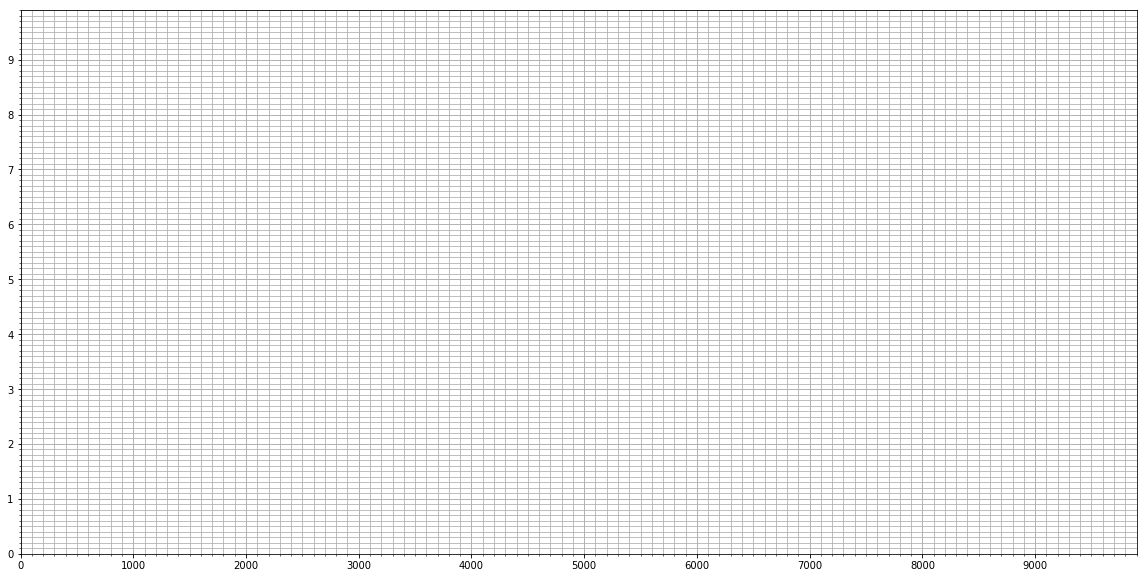

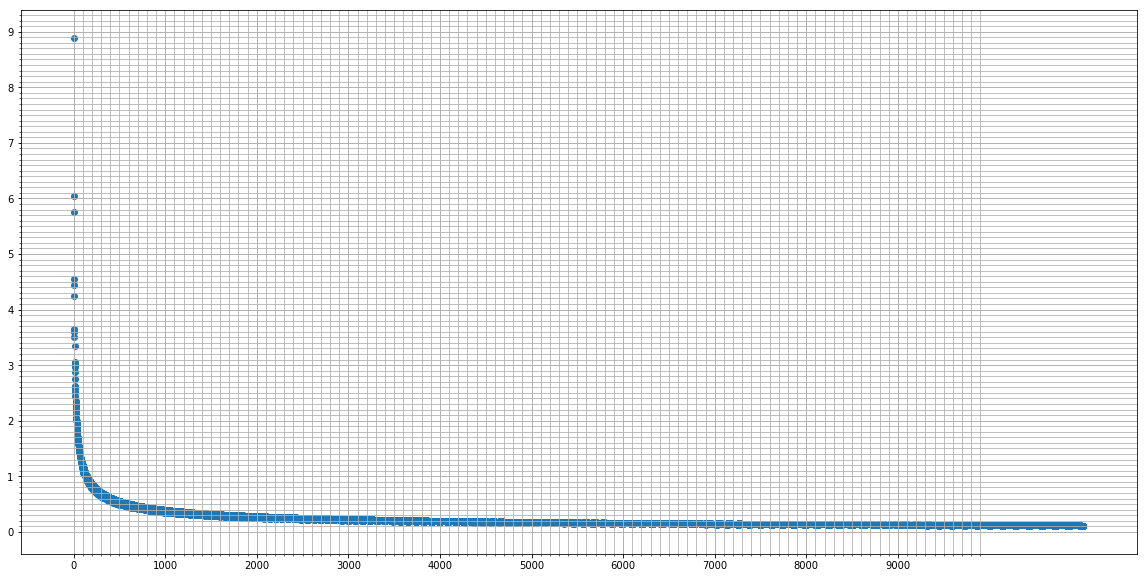

In [5]:
x_major_ticks = np.arange(0, 10, 1)
x_minor_ticks = np.arange(0, 10, 0.1)
y_major_ticks = np.arange(0, 10000, 1000)
y_minor_ticks = np.arange(0, 10000, 100)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
#plt.figure(figsize=(20,10))
ax.set_yticks(x_major_ticks)
ax.set_yticks(x_minor_ticks, minor=True)
ax.set_xticks(y_major_ticks)
ax.set_xticks(y_minor_ticks, minor=True)
ax.grid(which='both')
plt.scatter(x_list, y_list)
plt.show()

numer of runs:  0
[ 15.1917544]


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


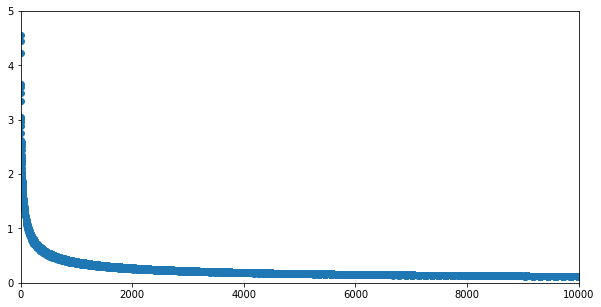

In [19]:
from scipy import optimize

def test_func_1(x, a):
    return a * float(1.0)/(x)

x_data = (0.01*np.array(x_list[:])).tolist()
y_data = (100*np.array(y_list[:])).tolist()
check_1 = 0
counter = 0
while check_1 == 0:
    print ('numer of runs: ', counter)
    counter += 1
    p_1 = np.random.uniform(2, 7)
    p_2 = np.random.uniform(0, 1)
    
    try:
        params_1, params_cov_1 = optimize.curve_fit(test_func_1, x_data, y_data, p0=[p_1])
        if params_1[0] < 0:
            continue
        check_1 = 1
    except:
        continue
        
print (params_1)

plt.figure(figsize=(10, 5))
plt.xlim(0.0001, 10000)
plt.ylim(0, 5)
plt.scatter(x_list, y_list)
func_1_data = []
for data in x_data:
    func_1_data.append(100*test_func_1(0.01*data, params_1[0]))
plt.plot(x_data, func_1_data, color='r')
plt.legend(loc='best')

plt.show()